In [1]:
from brian2 import *

---
## Thomas Stone's Central Complex
[link](https://github.com/tomish/brian-cx/blob/master/cx_simple.py)

Simple model of CX

In [2]:
start_scope()

taum = 20 * ms             # membrane time constant
taue = 5 * ms              # excitatory synaptic time constant
taui = 10 * ms             # inhibitory synaptic time constant
Vt = -50 * mV              # spike threshold
Vr = -65 * mV              # reset value
El = -70 * mV              # resting potential
we = (60 * 0.27 / 10) * mV # excitatory synaptic weight
wi = (20 * 4.5 / 10) * mV  # inhibitory synaptic weight
n = 40

eqs = Equations('''
      dVm/dt  = ((El - Vm) + Isyn) / taum : volt
      Isyn = ge - gi : volt
      dge/dt = -ge/taue : volt
      dgi/dt = -gi/taui : volt
      ''')

threshold = "Vm >= Vt"
reset = "Vm = Vr"

# spiketimes = [(0, 1 * ms),(0, 10 * ms)]
# Convert to Brian2
spike_indices = [0, 1]
spike_times = [1, 10] * ms

G_TL2 = SpikeGeneratorGroup(2, spike_indices, spike_times)
G_CL1a = NeuronGroup(N=16, model=eqs, threshold=threshold, reset=reset, method='euler')
G_CL1b = NeuronGroup(N=16, model=eqs, threshold=threshold, reset=reset, method='euler')
G_TB1 = NeuronGroup(N=16, model=eqs, threshold=threshold, reset=reset, method='euler')
G_CPU1 = NeuronGroup(N=16, model=eqs, threshold=threshold, reset=reset, method='euler')

#G_CL1a.V = 'Vr + rand() * (Vt - Vr)'
#G_CL1a.ge = 0*mV
#G_CL1a.gi = 0*mV

#G_CL1b.V = 'Vr + rand() * (Vt - Vr)'
#G_CL1b.ge = 0*mV
#G_CL1b.gi = 0*mV

#G_TB1.V = 'Vr + rand() * (Vt - Vr)'
#G_TB1.ge = 0*mV
#G_TB1.gi = 0*mV

#G_CPU1.V = 'Vr + rand() * (Vt - Vr)'
#G_CPU1.ge = 0*mV
#G_CPU1.gi = 0*mV



# C_LAL_CBL_1 = Connection(G_TL2, G_CL1a, 'ge')
# C_CBL_PB = Connection(G_CL1a, G_TB1, 'ge', weight=we)
# C_PB_PB_1 = Connection(G_TB1, G_TB1, 'gi', weight=wi)
# C_PB_CBL = Connection(G_TB1, G_CL1b, 'gi', weight=wi)
# C_PB_CBL = Connection(G_CL1b, G_CL1a, 'gi', weight=wi)
# Convert to Brian2
C_LAL_CBL_1 = Synapses(G_TL2, G_CL1a, on_pre='ge += we')
C_LAL_CBL_1.connect()
C_CBL_PB = Synapses(G_CL1a, G_TB1, on_pre='ge += we')
C_CBL_PB.connect()
C_PB_PB_1 = Synapses(G_TB1, G_TB1, on_pre='gi += wi')
C_PB_PB_1.connect()
C_PB_CBL = Synapses(G_TB1, G_CL1b, on_pre='gi += wi')
C_PB_CBL.connect()
C_PB_CBL_1 = Synapses(G_CL1b, G_CL1a, on_pre='gi += wi')
C_PB_CBL_1.connect()

M_TL2_spikes = SpikeMonitor(G_TL2)
M_CL1a_spikes = SpikeMonitor(G_CL1a)
M_TB1_spikes = SpikeMonitor(G_TB1)
M_CL1b_spikes = SpikeMonitor(G_CL1b)
M_CPU1_spikes = SpikeMonitor(G_CPU1)

CL1a_MV = StateMonitor(G_CL1a, 'Vm', record=True)
CL1a_Mge = StateMonitor(G_CL1a, 'ge', record=True)
CL1a_Mgi = StateMonitor(G_CL1a, 'gi', record=True)

TB1_MV = StateMonitor(G_TB1, 'Vm', record=True)
TB1_Mge = StateMonitor(G_TB1, 'ge', record=True)
TB1_Mgi = StateMonitor(G_TB1, 'gi', record=True)

CL1b_MV = StateMonitor(G_CL1b, 'Vm', record=True)
CL1b_Mge = StateMonitor(G_CL1b, 'ge', record=True)
CL1b_Mgi = StateMonitor(G_CL1b, 'gi', record=True)

CPU1_MV = StateMonitor(G_CPU1, 'Vm', record=True)
CPU1_Mge = StateMonitor(G_CPU1, 'ge', record=True)
CPU1_Mgi = StateMonitor(G_CPU1, 'gi', record=True)

In [3]:
run(500 * ms)

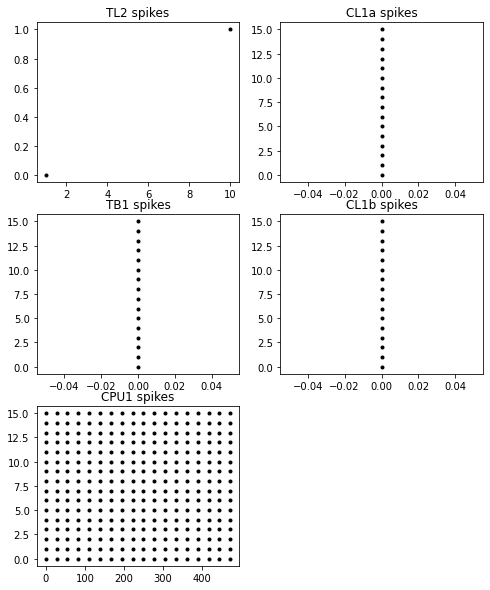

In [11]:
figure(figsize=(8,10))
#plotting spikes of TB 1 cells on raster plot.
subplot(3,2,1)
title('TL2 spikes')
plot(M_TL2_spikes.t/ms, M_TL2_spikes.i, '.k')

subplot(3,2,2)
title('CL1a spikes')
plot(M_CL1a_spikes.t/ms, M_CL1a_spikes.i, '.k')

subplot(3,2,3)
title('TB1 spikes')
plot(M_TB1_spikes.t/ms, M_TB1_spikes.i, '.k')

subplot(3,2,4)
title('CL1b spikes')
plot(M_CL1b_spikes.t/ms, M_CL1b_spikes.i, '.k')

subplot(3,2,5)
title('CPU1 spikes')
plot(M_CPU1_spikes.t/ms, M_CPU1_spikes.i, '.k')

In [4]:
def plot_stuff(M_spikes, MV, Mge, Mgi, name = '', observation_list=[0]):
    figure(figsize=(10,7))
    #plotting spikes of TB 1 cells on raster plot.
    subplot(2,2,1)
    title(f'{name} spikes')
    plot(M_spikes.t/ms, M_spikes.i, '.k')
    
    #observation_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    observation_list = observation_list

    #plotting voltage on TB1 cells
    subplot(2,2,2)
    title('V')
    for i in observation_list:
        plot(MV.t/ms, MV.Vm[i])

    subplot(2,2,3)
    title('ge')
    for i in observation_list:
        #plot(Mge.times / ms, Mge[i] / mV)
        plot(Mge.t/ms, Mge.ge[i])

    subplot(2,2,4)
    title('gi')
    for i in observation_list:
        #plot(Mge.times / ms, Mgi[i] / mV)
        plot(Mgi.t/ms, Mgi.gi[i])

    show()

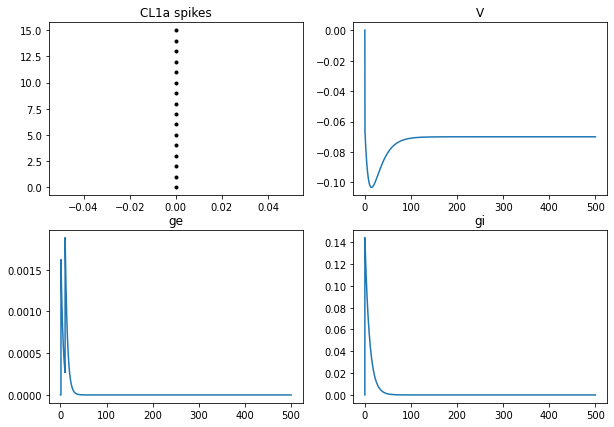

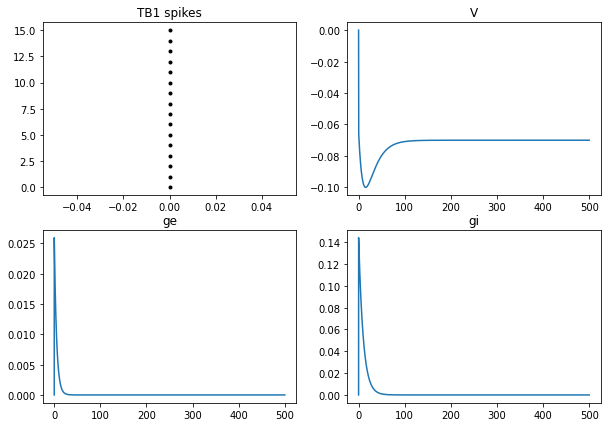

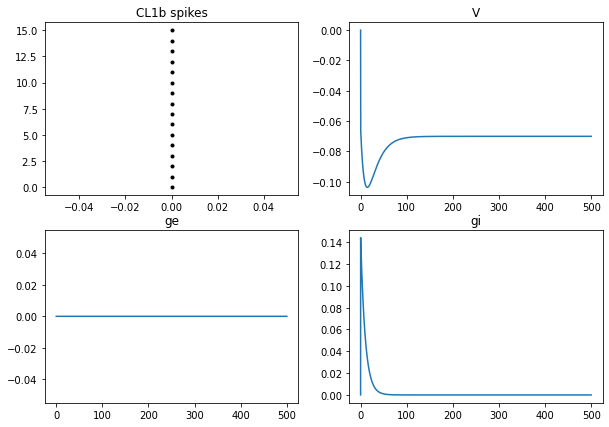

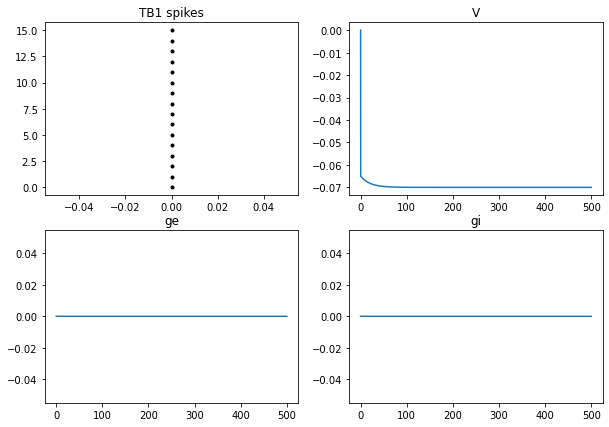

In [5]:
plot_stuff(M_CL1a_spikes, CL1a_MV, CL1a_Mge, CL1a_Mgi, name='CL1a', observation_list=[0])
plot_stuff(M_TB1_spikes, TB1_MV, TB1_Mge, TB1_Mgi, name='TB1', observation_list=[0])
plot_stuff(M_CL1b_spikes, CL1b_MV, CL1b_Mge, CL1b_Mgi, name='CL1b', observation_list=[0])
plot_stuff(M_CPU1_spikes, CPU1_MV, CPU1_Mge, CPU1_Mgi, name='TB1', observation_list=[0])

---
## More complex model

In [39]:
start_scope()

taum = 20 * ms             # membrane time constant
taue = 5 * ms              # excitatory synaptic time constant
taui = 10 * ms             # inhibitory synaptic time constant
Vt = -50 * mV              # spike threshold
Vr = -60 * mV              # reset value
El = -49 * mV              # resting potential
we = (60 * 0.27 / 10) * mV # excitatory synaptic weight
wi = (20 * 4.5 / 10) * mV  # inhibitory synaptic weight

we = 1.5 * mV
wi = 4.5 * mV

n = 40

# Izhikevich model
a = 0.02 / ms 
b = 0.2 / ms
c = Vr
d = 8 * mV/ms

eqs = '''dV/dt = (0.04/ms/mV)*V**2 + (5/ms)*V + 140*mV/ms - w + (ge - gi)/ms : volt
         dw/dt = a*(b*V - w) : volt/second
         dge/dt = -ge/taue         : volt
         dgi/dt = -gi/taui         : volt
      '''

# Threshold and Reset
threshold = 'V > Vt'

reset = '''V = Vr
           w = w + d
           '''

method = 'euler'


spike_indices = [6, 6, 10, 10, 10, 10, 10, 10]
spike_times = [1, 10, 500, 505, 510, 515, 520, 525] * ms


G_CL1a = SpikeGeneratorGroup(16, spike_indices, spike_times)

G_CL1b = NeuronGroup(N = 16, model = eqs, 
                     threshold = threshold, 
                     reset = reset,
                     method = method)
G_TB1 = NeuronGroup(N = 8, model = eqs,
                    threshold = threshold,
                    reset = reset,
                    method = method)
G_TB1.V = Vr + (Vt - Vr) * rand(len(G_TB1))
G_CPU1 = NeuronGroup(N = 16, model = eqs, 
                     threshold = threshold, 
                     reset = reset,
                     method = method)

In [40]:
# leftmost column is neuron with vericose arborisations in L1 and R8
TB1_TB1_array = array([[0   ,0   ,0.25,1   ,1   ,0.5 ,0   ,0   ],
                       [0   ,0   ,0   ,0.5 ,1   ,1   ,0.5 ,0   ],
                       [0.25,0   ,0   ,0   ,0.5 ,1   ,1   ,0.5 ],
                       [0.75,0.25,0   ,0   ,0   ,0.5 ,1   ,1   ],
                       [1   ,1   ,0.5 ,0   ,0   ,0   ,0.25,0.75],
                       [0.5 ,1   ,1   ,0.5 ,0   ,0   ,0   ,0.25],
                       [0   ,0.5 ,1   ,1   ,0.5 ,0   ,0   ,0   ],
                       [0   ,0   ,0.5 ,1   ,1   ,0.5 ,0   ,0   ]]) * nS

C_TB1_TB1 = Synapses(G_TB1, G_TB1, 'w_syn : siemens', on_pre='gi += wi')
C_TB1_TB1.connect()
C_TB1_TB1.w_syn = TB1_TB1_array.flatten()

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


CompileError: command 'clang' terminated by signal 6

In [ ]:
# CL1a neurons are numbers from L to R across the CBU
CL1a_TB1_array = array([[1,0,0,0,0,0,0,0],
                        [1,0,0,0,0,0,0,0],
                        [0,1,0,0,0,0,0,0],
                        [0,1,0,0,0,0,0,0],
                        [0,0,1,0,0,0,0,0],
                        [0,0,1,0,0,0,0,0],
                        [0,0,0,1,0,0,0,0],
                        [0,0,0,1,0,0,0,0],
                        [0,0,0,0,1,0,0,0],
                        [0,0,0,0,1,0,0,0],
                        [0,0,0,0,0,1,0,0],
                        [0,0,0,0,0,1,0,0],
                        [0,0,0,0,0,0,1,0],
                        [0,0,0,0,0,0,1,0],
                        [0,0,0,0,0,0,0,1],
                        [0,0,0,0,0,0,0,1]]) * nS

C_CL1a_TB1 = Synapses(G_CL1a, G_TB1, 'w_syn : siemens', on_pre='ge += we')
C_CL1a_TB1.connect()
C_CL1a_TB1.w_syn = CL1a_TB1_array.flatten()

In [ ]:
# Monitors
M_TB1_spikes = SpikeMonitor(G_TB1)
MV = StateMonitor(G_TB1, 'V', record=True)
Mge = StateMonitor(G_TB1, 'ge', record=True)
Mgi = StateMonitor(G_TB1, 'gi', record=True)

In [ ]:
run(1000 * ms)

In [ ]:
figure(figsize=(10,7))
#plotting spikes of TB 1 cells on raster plot.
subplot(2,2,1)
title('TB1 spikes')
plot(M_TB1_spikes.t/ms, M_TB1_spikes.i, '.k')

#observation_list = [0,1,2,3,4,5,6,7]#,8,9,10,11,12,13,14,15]
observation_list = [0]

#plotting voltage on TB1 cells
subplot(2,2,2)
title('V')
for i in observation_list:
    plot(MV.t/ms, MV.V[i])

subplot(2,2,3)
title('ge')
for i in observation_list:
    #plot(Mge.times / ms, Mge[i] / mV)
    plot(Mge.t/ms, Mge.ge[i])

subplot(2,2,4)
title('gi')
for i in observation_list:
    #plot(Mge.times / ms, Mgi[i] / mV)
    plot(Mge.t/ms, Mgi.gi[i])

show()